### Phase Portrait Classification

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import Matrix
import cma
import scipy as sc

#### Generating Phase Portraits

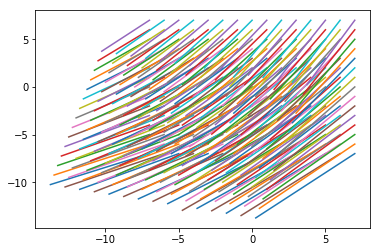

In [147]:
##Circle
A= np.array([[0, 1],[-1,0]])
##Star
# A= np.array([[1, 0],[0,1]])
##Saddle
# A= np.array([[0, 1],[1,0]])
##Spiral
# A= np.array([[0, 1],[-1,-1]])
##Node
# A= np.array([[-4, -2],[-2,-4]])
## Window Size
N=8
N1 =N

X_dash =  np.zeros((N*2,N*2,2))
# b = 10
# b = np.random.randn()
# print b
b = [-20,-20]
for i in range (-N+1,N) :
    for j in range (-N+1,N) :
        pos = np.array([i,j]).T
#         b = 10 #np.random.randn() 
        X_dash[i,j,0]=A[0].dot(pos) + b[0]
        X_dash[i,j,1]=A[1].dot(pos) + b[1]
# print X_dash 

X_dash[2,:,1] = X_dash[2,:,1] - 1.8
# X_dash[1,2:,0] = X_dash[1,2:,0] + 3


for x in range(-N+1,N):
    for y in range(-N+1,N):
        plt.plot([x,x+X_dash[x,y,0]/4],[y,y+X_dash[x,y,1]/4],'-')
plt.savefig('saddle_miss_20.png', bbox_inches='tight')

#### Manual entry for 3x3

In [38]:
# flow_man  = np.array([[[0.0000001, 0.00000001],[0.0000001,-0.2],[0.000000001,-0.2]],[[-0.2,0.0000001], \
#                                                                [-0.2, -0.2], [-0.1, -0.4]],[[ -0.2,0.000000001],[-0.4, -0.1],[-0.2, -0.2]]])
# flow_man = X_dash[-10:0,-10:0,:] +0.00001
# flow_man


#### Classifying Section of Phase Portrait

In [148]:
flow_man = X_dash[:,:,:] +0.00001
flow1 = flow_man                         #+ 0.0000001 #np.ones(((5,5,2)))*0.05
#flow1

#### Target function to be minimized

In [149]:

def sum_of_areas(x0_in,N = N1): 
#     x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[0.01,0.01]])
    x0 = np.array([[x0_in[0],x0_in[1]],[x0_in[2],x0_in[3]],[x0_in[4],x0_in[5]]])

#     N =11
    A_12 =  np.zeros((N,N))
    r_1 =np.zeros((N,N))
    r_2 = np.zeros((N,N))
    theta_1 = np.zeros((N,N))
    theta_2 = np.zeros((N,N))
    
#     N=
    
    for i in range (-N,N):
        for j in range (-N,N):
            pos = np.array([i,j]).T
            
            r_1[i,j] = np.sqrt(flow1[i][j][0]**2+flow1[i][j][1]**2)
#             r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2)
            r_2[i,j] = np.sqrt((x0[0].dot(pos)+x0[2,0])**2+(x0[1].dot(pos)+x0[2,1])**2)

            #print r_1
            #print r_2
            theta_1 [i,j]= np.arctan(flow1[i][j][1]/flow1[i][j][0])
            theta_2[i,j] = np.arctan((x0[1].dot(pos)+x0[2,1])/(x0[0].dot(pos)+x0[2,0]))#np.arctan(flow1[0][0][1]/flow1[0][0][0])
            #print theta_1,theta_2

            A_12[i,j]= 0.5 *r_1[i,j]*r_2[i,j]* abs(np.sin(theta_1[i,j] - theta_2[i,j])) #abs((theta_1[i,j] - theta_2[i,j]))

    S = np.sum(A_12)
    #print S
    #S= x0_in**2
    return S
    #theta_1[0,0]









#### Finding  Eigen Values  and Critical point  - Least Squares

In [150]:
from scipy.optimize import least_squares,minimize
import time
start = time.clock()
# x0_sum_of_area = np.array([0.0001,1.001,0.00001,0.001,0.001,0.001,0.001])
x0_sum_of_area = np.array([1.,1.,0.0000001,0.0000001,0.001,0.001,0.001])


# es = cma.CMAEvolutionStrategy(x0_sum_of_area, 0.5,{'tolx' : 1e-2})
# res_1 = es.optimize(sum_of_areas)
# print res_1.result.xbest

# x0_sum_of_area = np.array([0.0001,0.0001,0.0000001,.0000001,0.00001,0.0000001])
# res_1 = sc.optimize.curve_fit(sum_of_areas, x0_sum_of_area)
res_1 = least_squares(sum_of_areas, x0_sum_of_area) #,xtol = 1e-3, ftol = 1e-6)
# res_1 = minimize(sum_of_areas, x0_sum_of_area,method='SLSQP')#,options={'ftol': 1e-3,})
# res_1.x

A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])

# A_final = np.array([[res_1.result.xbest[0],res_1.result.xbest[1]],[res_1.result.xbest[2],res_1.result.xbest[3]]])
# b_final =  np.array([[res_1.result.xbest[4]],[res_1.result.xbest[5]]])


A_eig,v  = np.linalg.eig(A_final)
A_eig
b_final
x_zero = -np.linalg.inv(A_final).dot(b_final)
x_zero
print A_eig
print '***************'
print A_final
print"********"
m = Matrix(A_final)
P, J = m.jordan_form()
print 'Jordan'
print J
print '***************'
print x_zero
# print b_final
print time.clock() - start

[0.01425921 0.27604145]
***************
[[0.09832301 0.08273179]
 [0.18057977 0.19197765]]
********
Jordan
Matrix([[0.0142592103416779, 0], [0, 0.276041449840136]])
***************
[[-9.10219308]
 [ 9.45112822]]
49.493478


#### CMA-ES

In [151]:
from scipy.optimize import least_squares
import time
start = time.clock()
# x0_sum_of_area = np.array([0.1,1,1,.01,0.01,0.01])

x0_sum_of_area = np.array([1.,0.0000001,0.0000001,1.])
# x0_0 = np.array([1.,0.0000001,0.0000001,1.,0.001,0.001,0.001])
x0_0 = np.array([1.,1.,0.0000001,0.0000001,0.001,0.001,0.001])
# es = cma.CMAEvolutionStrategy(x0_0, 0.5, {'tolx' : 1e-3, 'tolfun': 1e-2})
es = cma.CMAEvolutionStrategy(x0_0, 0.5, {'tolx' : 1e-2, 'tolfun': 1e-3})# 'CMA_diagonal': True})

res_1 = es.optimize(sum_of_areas)
print res_1.result.xbest

# res_1 = least_squares(sum_of_areas, x0_sum_of_area, ftol = 1e-3)
# res_1 = minimize(sum_of_areas, x0_sum_of_area,method='SLSQP')#,options={'ftol': 1e-3,})
# res_1.x

# A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
# b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
A_final = np.array([[res_1.result.xbest[0],res_1.result.xbest[1]],[res_1.result.xbest[2],res_1.result.xbest[3]]])
b_final =  np.array([[res_1.result.xbest[4]],[res_1.result.xbest[5]]])


A_eig,v  = np.linalg.eig(A_final)
A_eig
# b_final
x_zero = -np.linalg.inv(A_final) .dot(b_final)
x_zero
print A_eig
print '***************'
print A_final
print"********"
m = Matrix(A_final)
P, J = m.jordan_form()
print 'Jordan'
print J
print '***************'
print x_zero
# print b_final
print time.clock() - start


(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 7 (seed=556480, Tue Jan 15 03:42:15 2019)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 5.586994592387253e+03 1.0e+00 4.51e-01  4e-01  5e-01 0:00.1
    2     18 5.331113398725025e+03 1.2e+00 4.22e-01  4e-01  4e-01 0:00.2
    3     27 2.951706339236657e+03 1.3e+00 4.28e-01  4e-01  5e-01 0:00.3
   39    351 1.107008908951344e+02 1.0e+01 1.12e-01  6e-02  1e-01 0:03.3
   88    792 6.706736593428333e+00 4.9e+01 2.36e-02  1e-02  3e-02 0:07.3
   97    873 3.638636633794877e+00 6.3e+01 9.34e-03  4e-03  1e-02 0:08.1
[-0.00047595  0.02041354 -0.01409378  0.01086709 -0.2887155  -0.29626114
  0.43040572]
[0.00519557+0.01598555j 0.00519557-0.01598555j]
***************
[[-0.00047595  0.02041354]
 [-0.01409378  0.01086709]]
********
Jordan
Matrix([[0.00519556657808587 - 0.0159855479486508*I, 0], [0, 0.00519556657808587 + 0.0159855479486508*I]])
***************
[[-10.30058395]
 [ 13.90317162]]
8.731904


#### CMSA-ES

In [42]:
from scipy.optimize import least_squares
from evoalgos.algo import CMSAES
import time
start = time.clock()
x0_sum_of_area = np.array([0.1,1,1,.01,0.01,0.01])

x0_sum_of_area = np.array([1.,1.,0.0000001,.0000001,0.00001,0.0000001])
x0_0 = np.array([0,0,0,0,0,0])

res_1 = CMSAES.minimize(sum_of_areas, x0_sum_of_area)

# es = cma.CMAEvolutionStrategy(x0_0, 0.5,{'tolx' : 1e-2})
# res_1 = es.optimize(sum_of_areas)
# print res_1.result.xbest

# res_1 = least_squares(sum_of_areas, x0_sum_of_area, ftol = 1e-3)
# res_1 = minimize(sum_of_areas, x0_sum_of_area,method='SLSQP')#,options={'ftol': 1e-3,})
# res_1.x

# A_final = np.array([[res_1.x[0],res_1.x[1]],[res_1.x[2],res_1.x[3]]])
# b_final =  np.array([[res_1.x[4]],[res_1.x[5]]])
# A_final = np.array([[res_1.result.xbest[0],res_1.result.xbest[1]],[res_1.result.xbest[2],res_1.result.xbest[3]]])
# b_final =  np.array([[res_1.result.xbest[4]],[res_1.result.xbest[5]]])


# A_eig,v  = np.linalg.eig(A_final)
# A_eig
# b_final
# x_zero = -np.linalg.inv(A_final).dot(b_final)
# x_zero
# print A_eig
# print '***************'
# print A_final
# print"********"
# m = Matrix(A_final)
# P, J = m.jordan_form()
# print 'Jordan'
# print J
# print '***************'
# print x_zero
# # print b_final
# print time.clock() - start


CMSAES running on problem Problem(sum_of_areas)


KeyboardInterrupt: 

In [43]:
soa = sum_of_areas(res_1.result.xbest)
# soa = sum_of_areas(res_1.x)
print soa

25.917574043905013


In [27]:
m = Matrix(A_final)
P, J = m.jordan_form()
print 'Jordan'
print J


fit_map = np.zeros((22,22))

node=1
saddle=2
star=3
improper=4
center=5
spiral=6



root1 = A_eig[0]
root2 = A_eig[1]
l_1 = J[0,0]
l_2 = J[1,1]
imp = J[0,1]
xx=0
yy=0
if isinstance(root1,complex):
    alpha = root1.real
    if alpha<1e-5:
        phase= 'center'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11]
    else:
        phase = 'spiral'
elif ((np.sign(l_1)==np.sign(l_2)) and ((l_1 - l_2)<= 1e-3)):
    if (1-imp)<0.1:
         phase = 'imroper'
    else:
        phase = 'star'
        fit_map[0+xx*11:11+xx*11,0+yy*11:11+yy*11] = star
        print fit_map
         
elif(abs(l_1-l_2)>1e-3):
    if (np.sign(l_1)==np.sign(l_2)):
         phase = 'node'
    else:
         phase = 'saddle'
print phase
     
     
     
     
    

Jordan
Matrix([[0.499964068184694, 0], [0, 0.500032132072918]])
[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [18]:
com = 6 + 5j
a,b= com.real, com.imag
a
b

5.0

In [70]:
A_final
res_1.x

array([ 0.52820021, -0.01230866, -0.00985031,  0.52574185,  0.39211801,
        0.01      ])

In [71]:
z=np.ones((3,3))
#z[0,2]
np.sum(z)

9.0

In [72]:
A = np.array([[1,1],[0,0]])
b = np.array([0,0]).T
# b = np.transpose(np.array([0,0]))
# np.shape(np.transpose(b))
c = A.dot(b)
A[0].dot(b) + A[1,1]

0

In [73]:
np.arctan(1/0.0000001)

1.5707962267948967

In [75]:
a = np.zeros(4)
for i in range(-2,2):
    a[i]=i
#     print i,a[i]
a

array([ 0.,  1., -2., -1.])

In [62]:
a

array([ 0.,  1., -1.])

In [ ]:
# import numpy as np
# A = np.array([[1., 1.], [1., 1.01]])
# b = np.array([[2.], [2.01]])
# x = np.linalg.lstsq(A, b)
# bs = np.array([[2.], [2.015]])
# xs = np.linalg.lstsq(A, bs)
# xs[0]